In [1]:
%matplotlib notebook
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

In [2]:
sector3_tpf="/home/labaf2/labaf2-01/group01_WASP-44_20201120/TESS_data/MAST_2021-11-29T0309/TESS/tess2018263035959-s0003-0000000012862099-0123-s/tess2018263035959-s0003-0000000012862099-0123-s_tp.fits"

In [3]:
fits.info(sector3_tpf)

Filename: /home/labaf2/labaf2-01/group01_WASP-44_20201120/TESS_data/MAST_2021-11-29T0309/TESS/tess2018263035959-s0003-0000000012862099-0123-s/tess2018263035959-s0003-0000000012862099-0123-s_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   19692R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [4]:
tp_read = fits.open(sector3_tpf)

In [5]:
print(tp_read)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff765695f10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff7263dcfa0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7ff7263d41c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff7263251c0>]


In [6]:
tp_read[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

The above cell shows that time is given in bjd coordinates minus a given constant, we'll have to convert time back to bjd to match taste data

(19692, 11, 11)


<IPython.core.display.Javascript object>


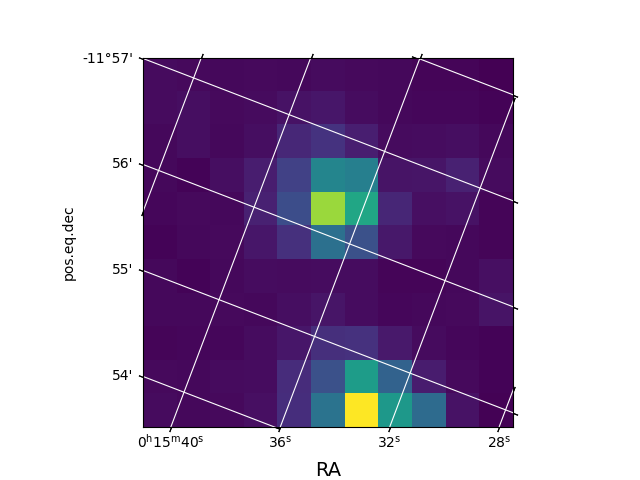

In [7]:
#plot the first image
tpf_data = tp_read[1].data
#print(tpf_data["flux"])
print(np.shape(tpf_data["flux"]))

wcs = WCS(tp_read[2].header)

fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(tpf_data["flux"][0], origin = "lower")
plt.grid(axis="both", color="white", ls="solid")
plt.xlabel("RA", fontsize=14)
plt.show()

In [8]:
print(tpf_data["TIME"][:10])

[1382.04024484 1382.04163374 1382.04302264 1382.04441153 1382.04580043
 1382.04718933 1382.04857822 1382.04996712 1382.05135602 1382.05274492]


In [9]:
#let's convert them in bjd
time = tpf_data["TIME"] + 2457000.0


In [10]:
tpf_head = tp_read[1].header
bjdref = tpf_head["BJDREFI"] + tpf_head["BJDREFF"]
#print(tpf_head)
#print(tpf_head["TTYPE2"])
print(bjdref)

2457000.0


In [11]:
print(time)

[2458382.04024484 2458382.04163374 2458382.04302264 ... 2458409.38547555
 2458409.38686438 2458409.38825322]


In [12]:
tp_read[1].columns
# we're going to work on flux, bkg flux and the quality factor

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

In [13]:
time_bjd = tp_read[1].data["TIME"] + bjdref
raw_counts = tp_read[1].data["RAW_CNTS"]
calibrated_frames = tp_read[1].data["FLUX"]
calibrated_frames_err = tp_read[1].data["FLUX_ERR"]

<IPython.core.display.Javascript object>


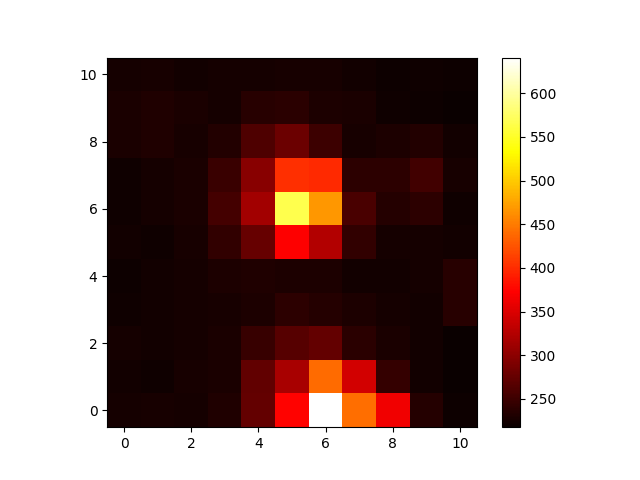

In [17]:
fig, ax = plt.subplots()
cax = ax.imshow(calibrated_frames[1,:,:], cmap = plt.cm.hot, origin="lower")
cbar = fig.colorbar(cax)
plt.show()

In [18]:
# now it's time to select aperture. This is not exactly chosen by us, since in the case of Kepler or TESS
# it is already defined by the science team

ap_image = tp_read[2].data
print(ap_image)

# we want to correct for the response of each pixel
# according to the properties of a pixel, we can mask some of them, so that we employ some for a certain purpose and 
# rule others out for other things

[[257 257 257 257 257 257 257 257 257 257 257]
 [257 257 257 257 257 257 257 257 257 257 257]
 [257 257 261 257 257 257 257 257 257 261 257]
 [257 261 261 257 257 257 257 257 261 257 257]
 [257 261 261 257 257 257 257 257 261 261 257]
 [257 261 261 257 257 267 267 257 261 261 257]
 [257 261 257 257 267 267 267 257 257 257 257]
 [257 261 261 257 257 267 267 257 257 257 257]
 [257 257 257 257 257 257 257 257 257 257 257]
 [257 257 257 261 257 257 257 261 261 261 257]
 [257 257 261 261 261 261 261 261 261 261 257]]


In [20]:
# let's write down the binary representation of the numbers we need
bits = np.binary_repr(267)
print(bits)

bits = np.binary_repr(257)
print(bits)

100001011
100000001


<IPython.core.display.Javascript object>


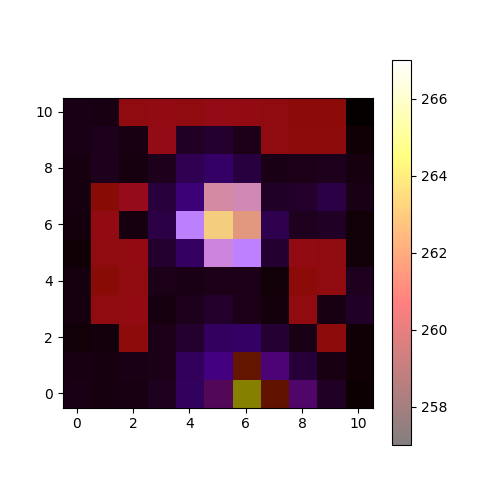

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(calibrated_frames[0,:,:], cmap = plt.cm.gnuplot, origin="lower")
cbx = ax.imshow(ap_image, cmap=plt.cm.hot, origin="lower", alpha=0.5)
cbar = fig.colorbar(cbx)
plt.show()

lighter cells are used for the flux, red ones for bkg only


Now we are ready for aperture photometry

In [29]:
# the following command compares entries of ap_image with the number 2
ap_wanet = np.bitwise_and(ap_image, 2)
print(ap_wanet)

# here we have 2 wherever there was 267, since the binary representation corresponds at the powers 1 and 2

#2 = 10
#267 = 100001011

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0 0]
 [0 0 0 0 0 2 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [30]:
ap_wanet = np.bitwise_and(ap_image, 3)
print(ap_wanet)

# here we have 3 wherever there was 267, since the binary representation corresponds at the powers 0,1,2
# and we have 1 wherever there was 257, since the representation corresponds at the powers 0

#3 = 11
#267 = 100001011
#257 = 100000001

[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 3 3 1 1 1 1]
 [1 1 1 1 3 3 3 1 1 1 1]
 [1 1 1 1 1 3 3 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


In [31]:
ap_want = np.bitwise_and(ap_image, 2)/2.
print(ap_want)

# this is to obtain the correct mask, only selecting th pixels belonging to the aperture

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
def aperture_phot(flux, flux_err, aperture):
    aperture_flux = np.sum(flux*aperture)
    #aperture_flux = np.sum(flux[aperture==1])
    aperture_flux_err = np.sqrt(np.sum(flux_err**2 * aperture))
    #aperture_flux_err = np.sqrt(np.sum(flux_err[aperture==1]**2))
    
    return aperture_flux, aperture_flux_err

In [36]:
print(np.shape(calibrated_frames))
print(np.shape(time_bjd))

(19692, 11, 11)
(19692,)


In [39]:
n_cadence = np.shape(time_bjd)[0]

optimal_aperture_flux = np.empty(n_cadence)
optimal_aperture_flux_err = np.empty(n_cadence)
# and now we're going to fill in these arrays

for ii in range(0, n_cadence):
    optimal_aperture_flux[ii],optimal_aperture_flux_err[ii] = aperture_phot(calibrated_frames[ii,:,:], calibrated_frames_err[ii,:,:], ap_want)

print(optimal_aperture_flux)
print(optimal_aperture_flux_err)

[2848.31988525 2844.32165527 1299.99533081 ... 1297.41049957 1297.52867889
 1255.78128815]
[5.96560466 5.96289059 6.04544461 ... 7.71938269 7.71595701 7.68858671]


<IPython.core.display.Javascript object>


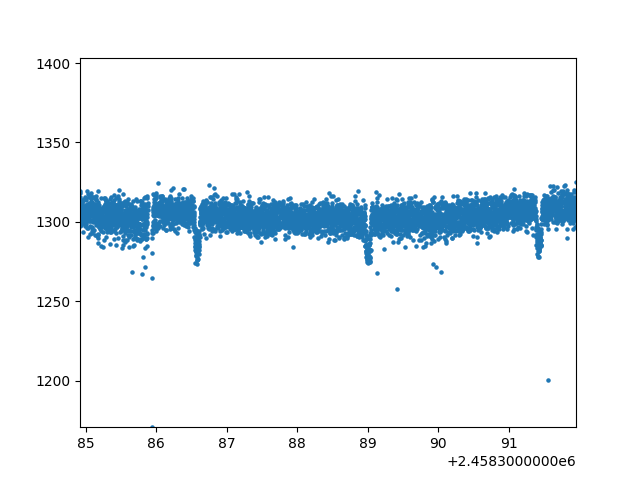

In [41]:
plt.figure()
plt.scatter(time_bjd, optimal_aperture_flux, s=5)
plt.show()

In [ ]:
# now we're going to remove outliers and identify the transits